## Convolution Neural Network(CNN) on MNIST Dataset

### MNIST digits classification dataset

<b>MNIST ("Modified National Institute of Standards and Technology")</b> is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.


This is a dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images. 




In [49]:
#importing libraries
import numpy as np
import pandas as pd
import tensorflow as tf#tensorflow
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')
import random
random.seed(0)

In [3]:
#checking the version of tensorflow
tf.__version__

'2.5.0'

In [4]:
#Loading the mnist Dataset

In [5]:
from tensorflow.keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [6]:
print(x_train.shape)#checkig the shape of the X_train
print(y_train.shape)#checkig the shape of the y_train
print(x_test.shape)#checkig the shape of the X_test
print(y_test.shape)#checkig the shape of the y_test

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [7]:
#lets comare an xtrain and ytrain sample

Label: 5


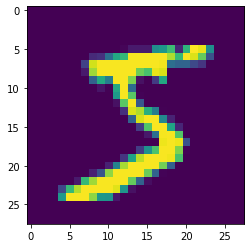

In [8]:
print('Label:' , y_train[0])#0 is the number 5
plt.imshow(x_train[0])

In [ ]:
#Reshape train and test sets into compatible shapes

In [9]:
x_train1=x_train.reshape(60000, 28, 28,1)#reshape because the data passed in convolution n/w should be in 4D
x_test1=x_test.reshape(10000, 28, 28,1)

In [ ]:
#Normalize the data so that data is in range 0-1

In [10]:
x_train2=x_train1/255.#Normalize

x_test2=x_test1/255.

In [11]:
x_train2.shape,x_test2.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [ ]:
# One-hot encode the class vector

In [13]:
from tensorflow.keras.utils import to_categorical
y_train2=to_categorical(y_train,num_classes=10)
y_test2=to_categorical(y_test,num_classes=10)

In [14]:
print(y_train[1])
y_train2[1]# 0 will be denoted in the below foramt

0


array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
#Model Building

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D , MaxPool2D

In [32]:
model=Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=16, kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=64,activation='relu'))
model.add(Dense(units=10,activation='softmax'))

In [33]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])#Configures the model for training.

In [51]:
model1=model.fit(x_train2,y_train2,batch_size=50,epochs=10,validation_split=0.2)
#Validation split: 20 % data used for validation

Epoch 1/10
960/960 [==============================] - 44s 46ms/step - loss: 0.0883 - accuracy: 0.9726 - val_loss: 0.0644 - val_accuracy: 0.9800
Epoch 2/10
960/960 [==============================] - 42s 44ms/step - loss: 0.0837 - accuracy: 0.9741 - val_loss: 0.0618 - val_accuracy: 0.9816
Epoch 3/10
960/960 [==============================] - 42s 44ms/step - loss: 0.0795 - accuracy: 0.9750 - val_loss: 0.0597 - val_accuracy: 0.9818
Epoch 4/10
960/960 [==============================] - 38s 40ms/step - loss: 0.0752 - accuracy: 0.9767 - val_loss: 0.0561 - val_accuracy: 0.9831
Epoch 5/10
960/960 [==============================] - 38s 39ms/step - loss: 0.0732 - accuracy: 0.9766 - val_loss: 0.0598 - val_accuracy: 0.9814
Epoch 6/10
960/960 [==============================] - 38s 39ms/step - loss: 0.0718 - accuracy: 0.9771 - val_loss: 0.0572 - val_accuracy: 0.9832
Epoch 7/10
960/960 [==============================] - 38s 39ms/step - loss: 0.0692 - accuracy: 0.9780 - val_loss: 0.0556 - val_accuracy:

In [42]:
#Model Evalutaion
#Calculate Final loss and accuracy on test data:

In [52]:
model.evaluate(x_test2,y_test2)

313/313 [==============================] - 3s 11ms/step - loss: 0.0404 - accuracy: 0.9863


[0.04038700833916664, 0.986299991607666]

In [53]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 16)        4624      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)              

In [54]:
#Plotting

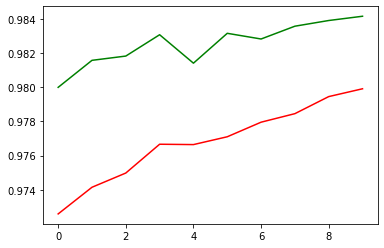

In [55]:
plt.plot(model1.history['accuracy'],'r')
plt.plot(model1.history['val_accuracy'],'g')

In [ ]:
#---------------------------------------------END-------------------------------------------------------#